In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

/Users/jteruya/.pyenv/versions/3.8.0/lib/python3.8/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
# Display Plot within Jupyter Notebook
%matplotlib inline
# Default Plot Size
plt.rcParams['figure.figsize'] = [10, 10]

In [3]:
vix_df = yf.download("^VIX", start = "2019-01-01", end = "2020-12-17")
sp500_df = yf.download("^GSPC", start = "2019-01-01", end = "2020-12-17")
dow_df = yf.download("^DJI", start = "2019-01-01", end = "2020-12-17")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
def market_movement(row):
    return (row['Close'] - row['Open'])/row['Open']

In [5]:
vix_df['Vix Percent Movement'] = vix_df.apply(market_movement, axis=1)
sp500_df['SP500 Percent Movement'] = sp500_df.apply(market_movement, axis=1)
dow_df['Dow Percent Movement'] = dow_df.apply(market_movement, axis=1)

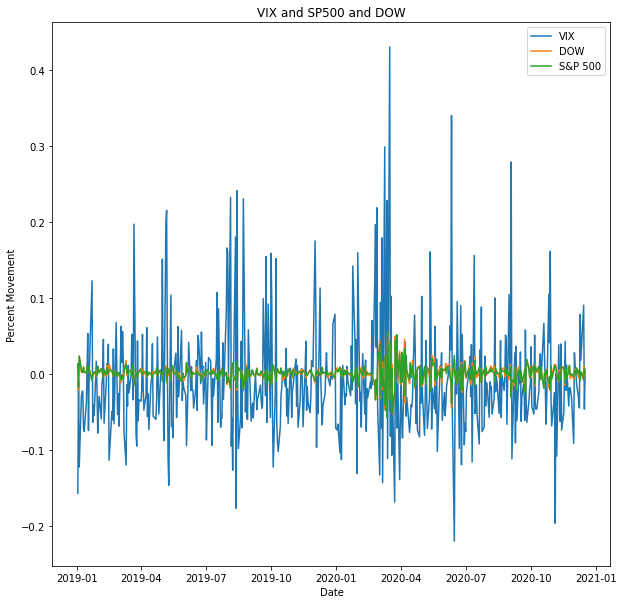

In [6]:
plt.plot(vix_df['Vix Percent Movement'], label="VIX")
plt.plot(dow_df['Dow Percent Movement'], label="DOW")
plt.plot(sp500_df['SP500 Percent Movement'], label="S&P 500")
plt.xlabel('Date')
plt.ylabel('Percent Movement')
plt.title('VIX and SP500 and DOW')
plt.legend()
plt.show()

In [7]:
all_indices_df = pd.concat([vix_df['Vix Percent Movement'], sp500_df['SP500 Percent Movement'], dow_df['Dow Percent Movement']], axis=1)

In [18]:
all_indices_df['SP500 Percent Movement +1'] = all_indices_df['SP500 Percent Movement'].shift(-1)
all_indices_df['SP500 Percent Movement +2'] = all_indices_df['SP500 Percent Movement'].shift(-2)
all_indices_df['SP500 Percent Movement +3'] = all_indices_df['SP500 Percent Movement'].shift(-3)
all_indices_df['Dow Percent Movement +1'] = all_indices_df['Dow Percent Movement'].shift(-1)
all_indices_df['Dow Percent Movement +2'] = all_indices_df['Dow Percent Movement'].shift(-2)
all_indices_df['Dow Percent Movement +3'] = all_indices_df['Dow Percent Movement'].shift(-3)
all_indices_df['Vix Percent Movement +1'] = all_indices_df['Vix Percent Movement'].shift(-1)
all_indices_df['Vix Percent Movement +2'] = all_indices_df['Vix Percent Movement'].shift(-2)
all_indices_df['Vix Percent Movement +3'] = all_indices_df['Vix Percent Movement'].shift(-3)

In [19]:
all_indices_df

,Vix Percent Movement,SP500 Percent Movement,Dow Percent Movement,SP500 Percent Movement +1,SP500 Percent Movement +2,SP500 Percent Movement +3,Dow Percent Movement +1,Dow Percent Movement +2,Dow Percent Movement +3,Vix Percent Movement +1,Vix Percent Movement +2,Vix Percent Movement +3
Date,,,,,,,,,,,,
2019-01-02,-0.156863,0.013351,0.012474,-0.017669,0.023283,0.005553,-0.021150,0.023509,0.002432,-0.008956,-0.122332,-0.029918
2019-01-03,-0.008956,-0.017669,-0.021150,0.023283,0.005553,0.002453,0.023509,0.002432,0.004524,-0.122332,-0.029918,-0.023378
2019-01-04,-0.122332,0.023283,0.023509,0.005553,0.002453,0.001922,0.002432,0.004524,0.001462,-0.029918,-0.023378,-0.022505
2019-01-07,-0.029918,0.005553,0.002432,0.002453,0.001922,0.008988,0.004524,0.001462,0.008014,-0.023378,-0.022505,-0.070543
2019-01-08,-0.023378,0.002453,0.004524,0.001922,0.008988,0.003149,0.001462,0.008014,0.002337,-0.022505,-0.070543,-0.075711
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-10,0.018083,0.002451,-0.001108,0.002019,-0.007559,0.007694,0.001939,-0.008709,0.009366,0.036461,0.090428,-0.046250
2020-12-11,0.036461,0.002019,0.001939,-0.007559,0.007694,0.001331,-0.008709,0.009366,-0.001220,0.090428,-0.046250,-0.000444
2020-12-14,0.090428,-0.007559,-0.008709,0.007694,0.001331,NaN,0.009366,-0.001220,NaN,-0.046250,-0.000444,NaN


In [20]:
all_indices_df.corr(method ='pearson')

,Vix Percent Movement,SP500 Percent Movement,Dow Percent Movement,SP500 Percent Movement +1,SP500 Percent Movement +2,SP500 Percent Movement +3,Dow Percent Movement +1,Dow Percent Movement +2,Dow Percent Movement +3,Vix Percent Movement +1,Vix Percent Movement +2,Vix Percent Movement +3
Vix Percent Movement,1.000000,-0.654712,-0.608546,0.164447,-0.126187,-0.050569,0.152391,-0.149893,-0.019705,-0.109299,0.116195,-0.018557
SP500 Percent Movement,-0.654712,1.000000,0.957918,-0.284093,0.146587,-0.055295,-0.290958,0.164429,-0.095920,0.230460,-0.145308,0.043880
Dow Percent Movement,-0.608546,0.957918,1.000000,-0.257599,0.148827,-0.037794,-0.277871,0.166488,-0.088312,0.216658,-0.142523,0.031305
SP500 Percent Movement +1,0.164447,-0.284093,-0.257599,1.000000,-0.281250,0.142284,0.957820,-0.287822,0.160329,-0.653459,0.230855,-0.142089
SP500 Percent Movement +2,-0.126187,0.146587,0.148827,-0.281250,1.000000,-0.276125,-0.254967,0.957601,-0.282865,0.158776,-0.655384,0.226810
SP500 Percent Movement +3,-0.050569,-0.055295,-0.037794,0.142284,-0.276125,1.000000,0.144998,-0.248851,0.957223,-0.118584,0.159609,-0.653287
Dow Percent Movement +1,0.152391,-0.290958,-0.277871,0.957820,-0.254967,0.144998,1.000000,-0.275042,0.162843,-0.607345,0.216969,-0.139620
Dow Percent Movement +2,-0.149893,0.164429,0.166488,-0.287822,0.957601,-0.248851,-0.275042,1.000000,-0.269240,0.145812,-0.609664,0.212296
Dow Percent Movement +3,-0.019705,-0.095920,-0.088312,0.160329,-0.282865,0.957223,0.162843,-0.269240,1.000000,-0.142685,0.146549,-0.607275
Vix Percent Movement +1,-0.109299,0.230460,0.216658,-0.653459,0.158776,-0.118584,-0.607345,0.145812,-0.142685,1.000000,-0.109845,0.110608
